In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as implt
import cv2 
import glob


# please do not look at the codes present in Raw nbconvert format they were just expreimental codes 

     1.first step toward calibration is that we need to create and object point
     as size of our image
     2.prepare object sixe i.e nx and ny
     3.prepare objects and image points
     4.use glob.glob for acessing whole directory
     5.Find those who are satisfying our condition
     6.get there object and image points
     7.draw the lines 
     
     

In [2]:
nx=6
ny=9
#creating an object
objp = np.zeros((6*9,3), np.float32)
# abjp= np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)


In [3]:
def get_points(images,ny=9,nx=6):
#     print(images)
    objpoints=[]# for 3d space
    imgpoints=[]# for 2d space

  
    for i in range(len(images)):
        img=cv2.imread(images[i])
#         print(img)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (ny,nx),None)

        # If found, add object points, image points
        if ret == True:
#             print(1)
            #appending in object and image point
#             gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            objpoints.append(objp)
            imgpoints.append(corners)

            # Draw and display the corners
            img = cv2.drawChessboardCorners(img, (ny,nx), corners, ret)
    return objpoints,imgpoints,img

# OpenCV functions or other methods were used to calculate the correct camera matrix and distortion coefficients using the calibration chessboard images provided in the repository. The distortion matrix should be used to un-distort the test calibration image provided as a demonstration that the calibration is correct

In [4]:
images = glob.glob('camera_cal/calibration*.jpg')
# images

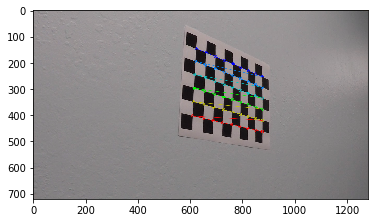

In [5]:
ny=9
nx=6
points=get_points(images,ny,nx)
plt.imshow(points[2])

    Here We have found the 2 metrices i.e object_poins and img points now 
    we can carry out color thresholding on undistorted image Now we can 
    save these files in an pickle img
 # Lets create a new python file and then calibrate our camera
 

In [6]:
objpoints=points[0]
imgpoints=points[1]
img=cv2.imread(images[0])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
retval, cameraMatrix, distCoeffs, rvecs, tvecs=cv2.calibrateCamera(objpoints,imgpoints,gray.shape[::-1],None,None)


In [7]:
import pickle
file = open('points', 'wb')

# dump information to that file
pickle.dump(points, file)
pickle.dump(cameraMatrix,file)
pickle.dump(distCoeffs,file)
file.close()

In [8]:
# import pickle
#For loding the pickle files
file = open('points', 'rb')

# dump information to that file
points= pickle.load(file)
c1=pickle.load(file)
d1=pickle.load(file)
# close the file
file.close()

In [9]:
# After getting the point not lets calibrate the camera
def cal_undistort(img, cameraMatrix,distCoeffs):

    undist=cv2.undistort(img,cameraMatrix,distCoeffs,None,cameraMatrix)
    return undist

In [10]:
cameraMatrix
distCoeffs

array([[-0.24688775, -0.02373133, -0.00109842,  0.00035108, -0.00258571]])

In [11]:
c1

array([[1.15777930e+03, 0.00000000e+00, 6.67111054e+02],
       [0.00000000e+00, 1.15282291e+03, 3.86128938e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [12]:
d1

array([[-0.24688775, -0.02373133, -0.00109842,  0.00035108, -0.00258571]])

In [13]:
images_for_cal = glob.glob('camera_cal/calibration*.jpg')

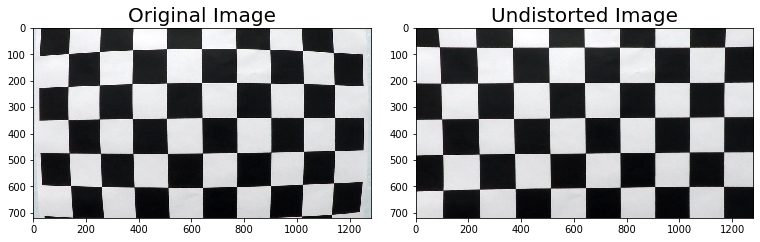

In [14]:
# a=images[0]

i=cv2.imread(images_for_cal[0])
# plt.imshow(cal_undistort(i,objpoints,imgpoints))

undistorted = cal_undistort(i, c1,d1)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
f.tight_layout()
ax1.imshow(i)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Now since the image is being undistorted so now saving it in undistorted format



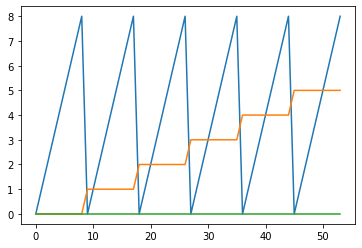

In [15]:
plt.plot(points[0][0])

In [16]:
import glob
test_images = glob.glob('test_images\*.jpg')
import cv2


def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Or use RGB2GRAY if you read an image with mpimg

def x_thresh(img, sobel_kernel=3, thresh=(0, 255)):
    gray = grayscale(img)
    # Take only Sobel x 
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    #Calculate the absolute value of the x derivative:
    abs_sobelx = np.absolute(sobelx)
    #Convert the absolute value image to 8-bit:
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    #Create binary image using thresholding
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return sxbinary

def mag_thresh(img, sobel_kernel=3, thresh=(0, 255)):
    # Convert to grayscale
    gray = grayscale(img)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= thresh[0]) & (gradmag <= thresh[1])] = 1

    # Return the binary image
    return binary_output

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    gray = grayscale(img)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    
    dir_grad = np.arctan2(abs_sobely, abs_sobelx)
    
    binary_output = np.zeros_like(dir_grad)
    binary_output[(dir_grad >= thresh[0]) & (dir_grad <= thresh[1])] = 1
   
    return binary_output
def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

    s = hls[:,:,2]
    s_binary = np.zeros_like(s)
    s_binary[(s > thresh[0]) & (s <= thresh[1])] = 1
    return s_binary



In [17]:
def show_cv2(img):
    cv2.imshow('1',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [54]:
# Define a function that takes an image, gradient orientation,
# and threshold min / max values.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Return the result
    return binary_output

# Define a function to return the magnitude of the gradient
# for a given sobel kernel size and threshold values
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output

# Define a function to threshold an image for a given range and Sobel kernel
def dir_thresh(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output

# Define a function that thresholds the S-channel of HLS
def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1
    return binary_output

def combine_binary(img, mag_binary, dir_binary, hls_binary, gradx_binary, grady_binary):
    """Combines gradients and color channel thresholding""" 
    
    binary_output = np.zeros_like(dir_binary)
    binary_output[((gradx_binary == 1) & (grady_binary == 1)) | ((mag_binary == 1) & (dir_binary == 1)) | (hls_binary == 1)] = 1    

    return binary_output



In [58]:
ret, mtx, dist, rvecs, tvecs =cv2.calibrateCamera(objpoints,imgpoints,gray.shape[::-1],None,None)


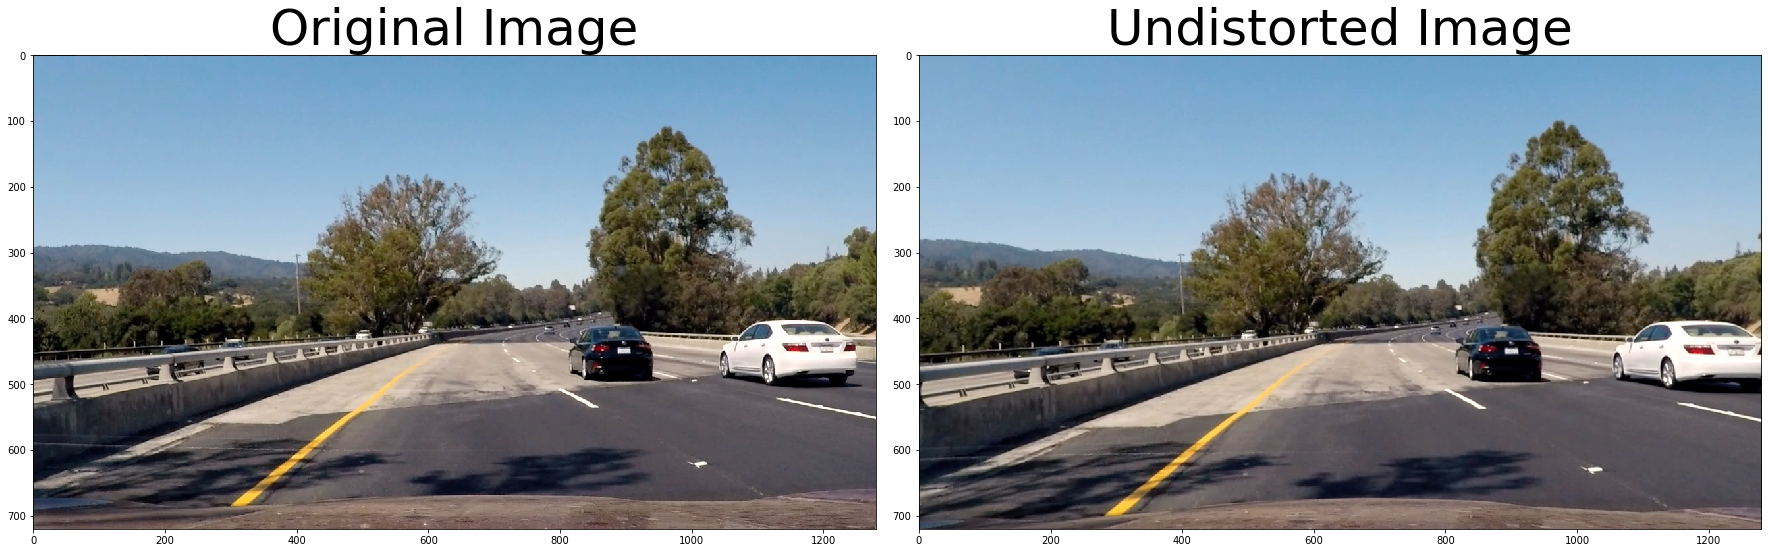

In [59]:
raw_image2 = cv2.imread('test_images/test4.jpg')
raw_image2 = cv2.cvtColor(raw_image2, cv2.COLOR_BGR2RGB)

undistorted2 = cv2.undistort(raw_image2, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(raw_image2)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted2)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

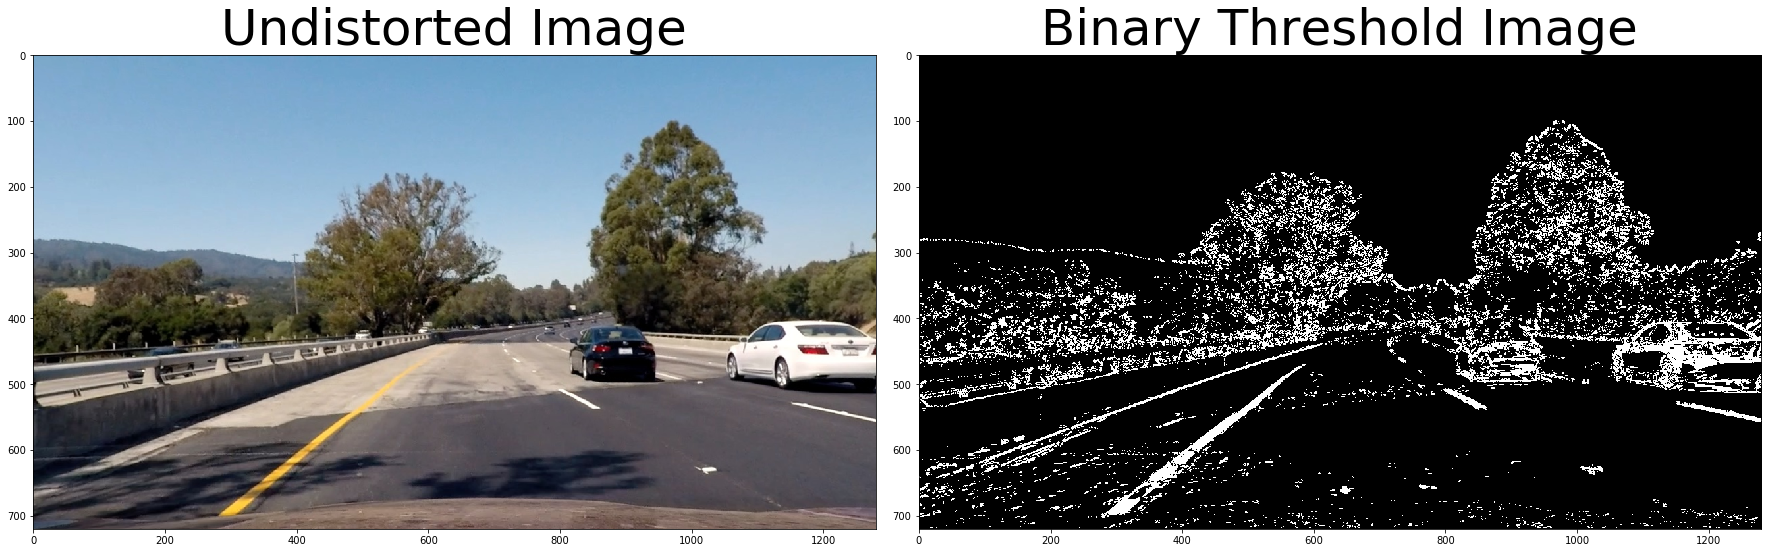

In [60]:

gradx_binary = abs_sobel_thresh(undistorted2, 'x', 15, 255)
grady_binary = abs_sobel_thresh(undistorted2, 'y', 15, 255)
mag_binary = mag_thresh(undistorted2, 3, mag_thresh=(20, 255))
dir_binary = dir_thresh(undistorted2, 15, (0.7, 1.3))
hls_binary = hls_select(undistorted2, thresh=(170, 255))
binary_image = combine_binary(undistorted2, mag_binary, dir_binary, hls_binary, gradx_binary, grady_binary)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(undistorted2)
ax1.set_title('Undistorted Image', fontsize=50)
ax2.imshow(binary_image, cmap='gray')
ax2.set_title('Binary Threshold Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [18]:

import numpy as np
def color_transformation(image):

    
#     sxbinary = x_thresh(image, sobel_kernel=3, thresh = (22,100))
#     mag_binary = mag_thresh(image, sobel_kernel=3, thresh=(40, 100))
#     dir_binary = dir_threshold(imaage, sobel_kernel=15, thresh=(0.7, 1.3))
#     s_binary = hls_select(image, thresh=(90, 255))
#     combined_binary1 = np.zeros_like(sxbinary)
      
#     combined_binary1[(s_binary == 1) | (sxbinary == 1)] = 1
    
    transfer_color=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    sensitivity = 25
    lower_white = np.array([0,0,255-sensitivity])
    upper_white = np.array([255,sensitivity,255])
    mask1=cv2.inRange(transfer_color,lower_white,upper_white)

    lower_yellow = np.array([20,100,100])
    upper_yellow = np.array([30,255,255])
    mask2=cv2.inRange(transfer_color,lower_yellow,upper_yellow)
    mask3=mask1+mask2
    return mask3


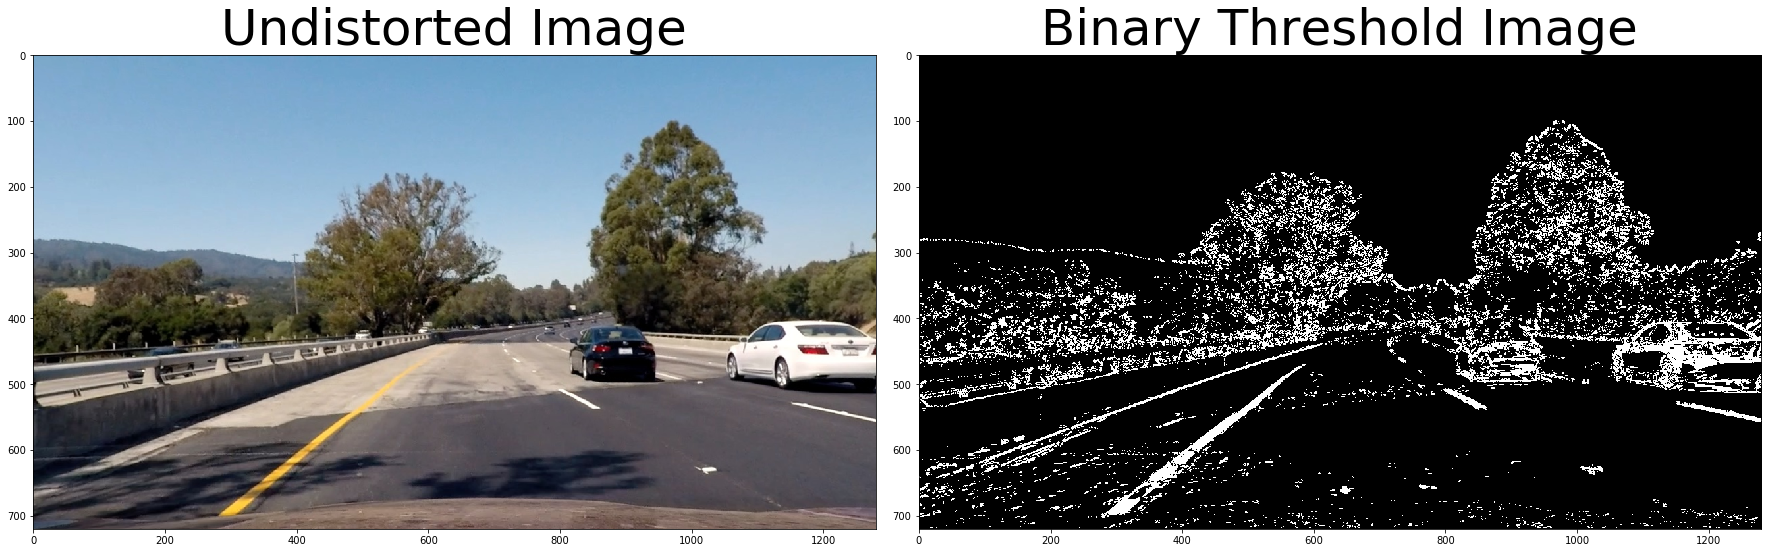

In [63]:
per_col_tra = color_transformation(undistorted2)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(undistorted2)
ax1.set_title('Undistorted Image', fontsize=50)
ax2.imshow(binary_image, cmap='gray')
ax2.set_title('Binary Threshold Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# This function  is for warping image and its result is warped image in bird eye view only with region of intrest
    Other Outputs are
    Inverse Matrix
    Reverse of the warped Image

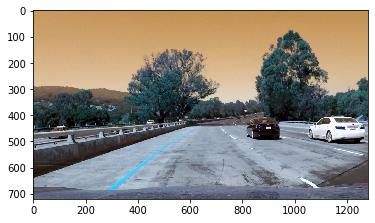

In [19]:
img=cv2.imread(test_images[2])
plt.imshow(img)

# In My case i have my videos in same directory so cap variable is like this.
# if you are testing it on your local Machine then kindly change it 

# Since best possible condition i.e thresholding is done so now lets change the prosepective and then apply histogram on it so that, we can then make our final model


    Procedure of porcepective transformation
    

In [20]:
def gcd(a,b): 
# Everything divides 0 
    if (b == 0): 
        return a 
    return gcd(b, a%b)

# THis is final wrap function

In [21]:
def wrap(undst_image):

    img_size=(undst_image.shape[1],undst_image.shape[0])

    src = np.float32(

    [[((img_size[0] / 6) - 10), img_size[1]],[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],

    [(img_size[0] / 2 + 55), img_size[1]/ 2 + 100],[(img_size[0] * 5 / 6) + 60, img_size[1]]])

    dst=np.float32([[240,720],[240,0],[1000,0],[1000,720]])

    #Given src and dst points, calculate the perspective transform matrix

    M=cv2.getPerspectiveTransform(src,dst)

    ##and calculate the inverse perspective transform matrix

    Minv=cv2.getPerspectiveTransform(dst,src)

    ## Warp the image using OpenCV warpPerspective()

    warped = cv2.warpPerspective(undst_image, M, img_size,flags=cv2.INTER_LINEAR)

    return warped,M,Minv

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
def hist(img):
    img=img/255.0
    vertices=np.float32([])
    bottom_half = img[img.shape[0]//2:,:]
    histogram = np.sum(bottom_half,axis=0)
    
    return histogram
# histogram[0]
# plt.imshow(img1)

# Used for finding lane pixels
    In case Kindly refer to warp function in above shell

In [23]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

# Load our image

def find_lane_pixels(binary_warped,plot=False):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 80
    # Set minimm number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    a=[]
    b=[]
    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        ### TO-DO: Find the four below boundaries of the window ###
        win_xleft_low = leftx_current-margin  # Update this
        win_xleft_high = leftx_current+margin  # Update this
        win_xright_low = rightx_current-margin  # Update this
        win_xright_high = rightx_current+margin  # Update this
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        ### TO-DO: Identify the nonzero pixels in x and y within the window ###
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
              
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        ### TO-DO: If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###
       # in case if we consider this as a road then current left or right centre musy be updates

        if len(good_left_inds)>minpix:
                
            leftx_current=np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
 
    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    ### TO-DO: Fit a second order polynomial to each using `np.polyfit` ###
    try:
        left_fit = np.polyfit(lefty,leftx,2)
        right_fit = np.polyfit(righty,rightx,2)
    except:
        pass
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [0, 255, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
#     print(left_fitx)
    mark_size = 3

    a_img=np.copy(out_img)
#     plt.plot(left_fitx, ploty,",", markersize=mark_size, color='red')
#     plt.plot(right_fitx, ploty,",", color='yellow')
    line_thickness = 2
#     pts=np.int32(left_fitx)
#     cv2.fillPoly(a_img,[pts], (0, 255, 0))
    
    return out_img,left_fit,right_fit,left_fitx,right_fitx


# This function takes 2 images as input one is frame image and other is warped image
Frmae image has shape (720x1080)
warped image has shape (720x1080)
# I have written comment in this function please read that
# this draw polygon inside the image

In [82]:
global previous_left,previous_right
previous_left=np.array([])
previous_right=np.array([])
def draw_lines(undist, warped,left_fit, right_fit, left_cur, right_cur, center,Minv, show_img = False ):
     
    warp_zero = np.zeros_like(warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    #ploty has an shape of 270
    ploty = np.linspace(0, warped.shape[0]-1,warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2+left_fit[1]*ploty+left_fit[2]
    right_fitx = right_fit[0]*ploty**2+right_fit[1]*ploty+right_fit[2]
    np.append(previous_left,left_fitx)
    np.append(previous_right,right_fitx)
    #Here i am also averaging it for reducing error 
    d1=previous_left.shape
    if d1[0]==0:
        pass
    else:
        left_fitx=sum(previous_left)/d1[0]
        right_fitx=sum(previous_right)/d1[0]
    
    pts_left = np.array([np.transpose(np.vstack([left_fitx[360:], ploty[360:]]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx[360:], ploty[360:]])))])
    pts = np.hstack((pts_left,pts_right))
    
    cv2.fillPoly(color_warp, np.int_([pts]), (200,200, 200))
    
    newwarp = cv2.warpPerspective(color_warp, Minv, (undist.shape[1], undist.shape[0])) 
    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
#     add_text_to_image(result, left_cur, right_cur, center)
    if show_img == True:
        plt.figure(figsize=(10,10))
        fig = plt.figure()
        plt.imshow(result)
    
    return result

In [83]:
import numpy as np

def generate_data(binary_warped,ym_per_pix, xm_per_pix):

    shape=binary_warped.shape
    ploty = np.linspace(0, shape[0]-1, num=shape[0])# to cover same y-range as image
    out_img,left_fit,right_fit,left_fitx,right_fitx=fit_polynomial(binary_warped)
    leftx = np.array([200 + (y**2)*left_fit[0] + left_fit[1]*y +left_fit[2]  
                                    for y in ploty])
    rightx = np.array([900 + (y**2)*right_fit[0] +right_fit[1]*y +right_fit[2] + np.random.randint(-50, high=51) 
                                    for y in ploty])

    leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
    rightx = rightx[::-1]  # Reverse to match top-to-bottom in y

    left_fit_cr = np.polyfit(ploty, leftx, 2)
    right_fit_cr = np.polyfit(ploty, rightx, 2)
    
    return ploty, left_fit_cr, right_fit_cr

    
def measure_curvature_real(image,left_fit,right_fit,print_data=False):
    '''
    Calculates the curvature of polynomial functions in meters.
    '''
    # Define conversions in x and y from pixels space to meters
#     ym_per_pix = 30/image.shape[1] # meters per pixel in y dimension
#     xm_per_pix = 3.7/image.shape[0] # meters per pixel in x dimension
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    # Start by generating our fake example data
    # Make sure to feed in your real data instead in your project!
    ploty, left_fit_cr, right_fit_cr = generate_data(image,ym_per_pix, xm_per_pix)
#     left_fit = np.polyfit(ploty, leftx, 2)
#     left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
#     right_fit = np.polyfit(ploty, rightx, 2)
#     right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    
    
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
    
    ##### TO-DO: Implement the calculation of R_curve (radius of curvature) #####

    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    left_lane_bottom = (left_fit[0]*y_eval)**2 + left_fit[0]*y_eval + left_fit[2]
    right_lane_bottom = (right_fit[0]*y_eval)**2 + right_fit[0]*y_eval + right_fit[2]
    # Lane center as mid of left and right lane bottom
                            
    lane_center = (left_lane_bottom + right_lane_bottom)/2.
    center_image = 640
    center = (lane_center - center_image)*xm_per_pix #Convert to meters
    
    if print_data == True:
        print(left_curverad, 'm', right_curverad, 'm', center, 'm')

    return left_curverad, right_curverad, center



In [84]:
def car_offset(binary_warped, left_fit, right_fit, xm_per_pix=3.7/700):
    """Calculates the vehicle position in the lane""" 
    
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])
    
    y_eval = np.max(ploty)
    #Calculate offset 
    car_position = binary_warped.shape[1]/2
    
    left_fitx = left_fit[0]*y_eval**2 + left_fit[1]*y_eval + left_fit[2]
    right_fitx = right_fit[0]*y_eval**2 + right_fit[1]*y_eval + right_fit[2]
    
    lane_center = (right_fitx + left_fitx) /2
    
    offset = (car_position - lane_center) * xm_per_pix
    
    return offset

In [85]:
def car_offset(binary_warped, left_fit, right_fit, xm_per_pix=3.7/700):
    """Calculates the vehicle position in the lane""" 
    
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])
    
    y_eval = np.max(ploty)
    #Calculate offset 
    car_position = binary_warped.shape[1]/2
    
    left_fitx = left_fit[0]*y_eval**2 + left_fit[1]*y_eval + left_fit[2]
    right_fitx = right_fit[0]*y_eval**2 + right_fit[1]*y_eval + right_fit[2]
    
    lane_center = (right_fitx + left_fitx) /2
    
    offset = (car_position - lane_center) * xm_per_pix
    
    return offset

In [86]:
def resize(img):
    '''This functioon is for resizing the images'''
    size=img.shape
    img=cv2.resize(img,(size[1]//2,size[0]//2),interpolation = cv2.INTER_AREA)
    return img

In [87]:
images_for_test = glob.glob('test_images/*.jpg')
images_for_cal = glob.glob('camera_cal/calibration*.jpg')
def callibration():
    '''For callibration'''
    
    objpoints,imgpoints,img=get_points(images_for_cal,9,6)# this is for calibration
    return objpoints,imgpoints
objpoints,imgpoints=callibration()


In [88]:
#if we have saved the pikle file for that then, we can do this other wise we can use codes in next lin
import pickle
file = open('points', 'rb')

# dump information to that file
points= pickle.load(file)
c1=pickle.load(file)#Camera Matrix
d1=pickle.load(file)#Distortion matrix
# close the file
file.close()

In [89]:
retval, cameraMatrix, distCoeffs, rvecs, tvecs=cv2.calibrateCamera(objpoints,imgpoints,gray.shape[::-1],None,None)


In [90]:
# def callibration():
'''This is the main pipeline of the image'''
# objpoints,imgpoints,im=get_points(images_for_cal,9,6)# this is for calibration
def pipeline(image,objpoints,imgpoints):
    ''' so here the image has dimenshion 720x1080'''
    '''undist is undistorted image'''
    undist=cal_undistort(image,c1,d1)
#     undist=np.copy(image)
    '''mask 3 is after color thresholding'''
    mask3=color_transformation(undist)
    size=mask3.shape
    '''warped_image and src are the Transformation to each other minv is the matrix'''
    warped_image,src,minv=wrap(undist)
    '''After using this transformation the warped_image shape becomes (270,1080)
    and same is for others'''
#     gradx_binary = abs_sobel_thresh(warped_image, 'x', 20, 255)
#     grady_binary = abs_sobel_thresh(warped_image, 'y', 20, 255)
#     mag_binary = mag_thresh(warped_image, 3, mag_thresh=(40, 255))
#     dir_binary = dir_thresh(warped_image, 15, (0.7, 1.3))
#     hls_binary = hls_select(warped_image, thresh=(170, 255))
#     per_col_transform = combine_binary(warped_image, mag_binary, dir_binary, hls_binary, gradx_binary, grady_binary)

    
    newwarp = cv2.warpPerspective(warped_image, minv, (warped_image.shape[1],warped_image.shape[0])) 
 
    '''per col transformation is the warped image after color transformation'''
    per_col_transform=color_transformation(warped_image)
    '''Mask3 is just image after thresholding'''
    mask3=cv2.resize(mask3,(per_col_transform.shape[1],per_col_transform.shape[0]),interpolation=cv2.INTER_AREA)    
    result = cv2.addWeighted(image, 1, newwarp, 0.5, 0)

    
    #per_col_transform is binary image
    out_img,left_fit,right_fit,left_fitx,right_fitx=fit_polynomial(per_col_transform)
    
    
    left_curverad, right_curverad,center=measure_curvature_real(per_col_transform,left_fit,right_fit)
    
    ca=car_offset(per_col_transform, left_fit, right_fit, xm_per_pix=3.7/700)
    
    i=draw_lines(image,per_col_transform,left_fit, right_fit, left_curverad, right_curverad, center,minv)
    
    '''This is just about lane curvature'''
    
    cv2.putText(result," Left_curvature::"+"%0.2f" % left_curverad+'m',(0,50),cv2.FONT_HERSHEY_SIMPLEX,
                1,(255,0,0),2)

    cv2.putText(result,"Right_curvature::"+"%0.2f" % right_curverad+'m',(0,100),cv2.FONT_HERSHEY_SIMPLEX,
                1,(255,0,0),2)
    cv2.putText(result,"Deviation::"+"%0.2f" % ca+'m',(0,150),cv2.FONT_HERSHEY_SIMPLEX,
                1,(255,0,0),2)
#     cv2.putText(result,"Deviation::"+"%0.2f" % center+'m',(0,150),cv2.FONT_HERSHEY_SIMPLEX,
#                 1,(255,0,0),2)
    '''Here it is used for vualistion its not a big deal'''
    verticalAppendedImg = np.vstack((result,newwarp))
    horizontalAppendedImg = np.hstack((mask3,per_col_transform))
    verticalAppendedImg=cv2.resize(verticalAppendedImg,(size[1]//2,size[0]//2),interpolation = cv2.INTER_AREA)
    horizontalAppendedImg=cv2.resize(horizontalAppendedImg,(size[1]//2,size[0]//2),interpolation = cv2.INTER_AREA)
    cv2.putText(i," Left_curvature::"+"%0.2f" % left_curverad+'m',(50,50),cv2.FONT_HERSHEY_SIMPLEX,
                1,(255,0,0),2)

    cv2.putText(i,"Right_curvature::"+"%0.2f" % right_curverad+'m',(50,100),cv2.FONT_HERSHEY_SIMPLEX,
                1,(255,0,0),2)
#     cv2.putText(i,"Deviation::"+"%0.2f" % center+'m',(50,150),cv2.FONT_HERSHEY_SIMPLEX,
#                 1,(255,0,0),2)
    cv2.putText(i,"Deviation::"+"%0.2f" % ca +' m',(50,150),cv2.FONT_HERSHEY_SIMPLEX,
                1,(255,0,0),2)
    r1=resize(i)
    r2=resize(out_img)
    '''it return 6 things 
    1.An visualisation
    2.Another visuaisation
    3.An test (curvature valure)
    4.An test (curvature valure)
    5.This is an visualtion after when each type of transformation has been taken place i.e color and then warp
    6. Final Result
    '''
    
    return verticalAppendedImg,horizontalAppendedImg,left_curverad, right_curverad,per_col_transform,r1,r2

# Undistorting the image was taking so much time such that video was becomingreally slow, so i decided to keeps it without undistorted only

In [91]:
import numpy as np
import cv2

cap = cv2.VideoCapture('project_video.mp4')
while(cap.isOpened()):
    ret, frame = cap.read()
    
    if ret==True:
        v,h,l,r,p,i,r2=pipeline(frame,objpoints,imgpoints)
        cv2.imshow('3d',v)
        cv2.imshow('2d',h)
#         cv2.imshow('color_',p)
        cv2.imshow('final',i)
        cv2.imshow('r2',r2)
#         cv2.imshow('result',result)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break
    else:
        cv2.destroyAllWindows()
        break

# Release everything if job is finished
cap.release()
# out.release()
cv2.destroyAllWindows()

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RankWarning: Polyfit may be poorly conditioned
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys


# This may not be the exact way of solving this probelm however as per my knowledge this is problem 

# Thank you